In [1]:
#Importing packets for calculations and plotting the graph
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.stats import cauchy
from scipy.stats import laplace
from scipy.stats import pareto
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline
#Importing pandas for databases 
import pandas as pd
#Import for Machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Cleaning the data

In [2]:
#Dataframe the flu data
database = pd.read_csv("FluNetInteractiveReport.csv", skiprows=3)
#Shows the Flu data
pd.set_option('display.max_rows', None, 'display.max_columns', None)
display(database)

Country  \
0     United Kingdom of Great Britain and Northern I...   
1     United Kingdom of Great Britain and Northern I...   
2     United Kingdom of Great Britain and Northern I...   
3     United Kingdom of Great Britain and Northern I...   
4     United Kingdom of Great Britain and Northern I...   
5     United Kingdom of Great Britain and Northern I...   
6     United Kingdom of Great Britain and Northern I...   
7     United Kingdom of Great Britain and Northern I...   
8     United Kingdom of Great Britain and Northern I...   
9     United Kingdom of Great Britain and Northern I...   
10    United Kingdom of Great Britain and Northern I...   
11    United Kingdom of Great Britain and Northern I...   
12    United Kingdom of Great Britain and Northern I...   
13    United Kingdom of Great Britain and Northern I...   
14    United Kingdom of Great Britain and Northern I...   
15    United Kingdom of Great Britain and Northern I...   
16    United Kingdom of Great Britain and Northern I...   
17    United Kingdom of Great Britain and Northern I...   
18    United Kingdom of Great Britain and Northern I...   
19    United Kingdom of Great Britain and Northern I...   
20    United Kingdom of Great Britain and Northern I...   
21    United Kingdom of Great Britain and Northern I...   
22    United Kingdom of Great Britain and Northern I...   
23    United Kingdom of Great Britain and Northern I...   
24    United Kingdom of Great Britain and Northern I...   
25    United Kingdom of Great Britain and Northern I...   
26    United Kingdom of Great Britain and Northern I...   
27    United Kingdom of Great Britain and Northern I...   
28    United Kingdom of Great Britain and Northern I...   
29    United Kingdom of Great Britain and Northern I...   
30    United Kingdom of Great Britain and Northern I...   
31    United Kingdom of Great Britain and Northern I...   
32    United Kingdom of Great Britain and Northern I...   
33    United Kingdom of Great Britain and Northern I...   
34    United Kingdom of Great Britain and Northern I...   
35    United Kingdom of Great Britain and Northern I...   
36    United Kingdom of Great Britain and Northern I...   
37    United Kingdom of Great Britain and Northern I...   
38    United Kingdom of Great Britain and Northern I...   
39    United Kingdom of Great Britain and Northern I...   
40    United Kingdom of Great Britain and Northern I...   
41    United Kingdom of Great Britain and Northern I...   
42    United Kingdom of Great Britain and Northern I...   
43    United Kingdom of Great Britain and Northern I...   
44    United Kingdom of Great Britain and Northern I...   
45    United Kingdom of Great Britain and Northern I...   
46    United Kingdom of Great Britain and Northern I...   
47    United Kingdom of Great Britain and Northern I...   
48    United Kingdom of Great Britain and Northern I...   
49    United Kingdom of Great Britain and Northern I...   
50    United Kingdom of Great Britain and Northern I...   
51    United Kingdom of Great Britain and Northern I...   
52    United Kingdom of Great Britain and Northern I...   
53    United Kingdom of Great Britain and Northern I...   
54    United Kingdom of Great Britain and Northern I...   
55    United Kingdom of Great Britain and Northern I...   
56    United Kingdom of Great Britain and Northern I...   
57    United Kingdom of Great Britain and Northern I...   
58    United Kingdom of Great Britain and Northern I...   
59    United Kingdom of Great Britain and Northern I...   
60    United Kingdom of Great Britain and Northern I...   
61    United Kingdom of Great Britain and Northern I...   
62    United Kingdom of Great Britain and Northern I...   
63    United Kingdom of Great Britain and Northern I...   
64    United Kingdom of Great Britain and Northern I...   
65    United Kingdom of Great Britain and Northern I...   
66    United Kingdom of Great Britain and Northern I...   
67    United Kingdom of Great Britai

In [3]:
#Shows detailed info of the data
database.info()
database.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            1304 non-null   object 
 1   WHOREGION          1304 non-null   object 
 2   FLUREGION          1304 non-null   object 
 3   Year               1304 non-null   int64  
 4   Week               1304 non-null   int64  
 5   SDATE              1304 non-null   object 
 6   EDATE              1304 non-null   object 
 7   SPEC_RECEIVED_NB   58 non-null     float64
 8   SPEC_PROCESSED_NB  750 non-null    float64
 9   AH1                739 non-null    float64
 10  AH1N12009          559 non-null    float64
 11  AH3                746 non-null    float64
 12  AH5                37 non-null     float64
 13  ANOTSUBTYPED       720 non-null    float64
 14  INF_A              750 non-null    float64
 15  BYAMAGATA          706 non-null    float64
 16  BVICTORIA          696 n

Year         Week  SPEC_RECEIVED_NB  SPEC_PROCESSED_NB  \
count  1304.000000  1304.000000         58.000000         750.000000   
mean   2006.998466    26.581288        231.137931         727.528000   
std       7.211209    15.062555        235.713657         765.338016   
min    1995.000000     1.000000          1.000000           0.000000   
25%    2001.000000    14.000000         33.000000          90.250000   
50%    2007.000000    27.000000        153.500000         557.000000   
75%    2013.000000    40.000000        392.000000        1097.750000   
max    2019.000000    53.000000        812.000000        4870.000000   

              AH1   AH1N12009         AH3   AH5  ANOTSUBTYPED        INF_A  \
count  739.000000  559.000000  746.000000  37.0    720.000000   750.000000   
mean     1.261164   39.672630   37.963807   0.0    107.379167   171.661333   
std      6.208722  111.488102  105.202777   0.0    325.469468   446.751452   
min      0.000000    0.000000    0.000000   0.0      0.000000     0.000000   
25%      0.000000    0.000000    0.000000   0.0      0.000000     2.000000   
50%      0.000000    2.000000    3.000000   0.0      2.000000    13.000000   
75%      0.000000   21.000000   16.750000   0.0     43.000000    97.500000   
max     95.000000  883.000000  881.000000   0.0   3061.000000  4015.000000   

        BYAMAGATA   BVICTORIA  BNOTDETERMINED        INF_B      ALL_INF  \
count  706.000000  696.000000      742.000000   750.000000   750.000000   
mean     2.579320    0.915230       53.374663    56.082667   227.744000   
std      7.814522    5.372458      211.925641   216.843907   584.009431   
min      0.000000    0.000000        0.000000     0.000000     0.000000   
25%      0.000000    0.000000        0.000000     0.000000     4.000000   
50%      0.000000    0.000000        2.000000     3.000000    23.000000   
75%      0.000000    0.000000       15.000000    16.750000   137.000000   
max     51.000000   76.000000     2046.000000  2093.000000  4107.000000   

       ALL_INF2  
count       0.0  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

#### From display we can visually see that a lot of data is blank
#### From info() we see that from column 7 to column 19 we have missing values and column 20 has no values in the column.
#### In describe() we see that column AH5 has only 37 values of zero and the rest are blank.
#### From this observation we can safely remove column AH5 and ALL_INF2

### Remove unwanted columns

In [4]:
#Removing columns with now values
remove_column=['AH5', 'ALL_INF2']
database.drop(columns=remove_column, inplace=True)

In [5]:
#Checking if the clumns are removed
database.info()
database.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            1304 non-null   object 
 1   WHOREGION          1304 non-null   object 
 2   FLUREGION          1304 non-null   object 
 3   Year               1304 non-null   int64  
 4   Week               1304 non-null   int64  
 5   SDATE              1304 non-null   object 
 6   EDATE              1304 non-null   object 
 7   SPEC_RECEIVED_NB   58 non-null     float64
 8   SPEC_PROCESSED_NB  750 non-null    float64
 9   AH1                739 non-null    float64
 10  AH1N12009          559 non-null    float64
 11  AH3                746 non-null    float64
 12  ANOTSUBTYPED       720 non-null    float64
 13  INF_A              750 non-null    float64
 14  BYAMAGATA          706 non-null    float64
 15  BVICTORIA          696 non-null    float64
 16  BNOTDETERMINED     742 n

Year         Week  SPEC_RECEIVED_NB  SPEC_PROCESSED_NB  \
count  1304.000000  1304.000000         58.000000         750.000000   
mean   2006.998466    26.581288        231.137931         727.528000   
std       7.211209    15.062555        235.713657         765.338016   
min    1995.000000     1.000000          1.000000           0.000000   
25%    2001.000000    14.000000         33.000000          90.250000   
50%    2007.000000    27.000000        153.500000         557.000000   
75%    2013.000000    40.000000        392.000000        1097.750000   
max    2019.000000    53.000000        812.000000        4870.000000   

              AH1   AH1N12009         AH3  ANOTSUBTYPED        INF_A  \
count  739.000000  559.000000  746.000000    720.000000   750.000000   
mean     1.261164   39.672630   37.963807    107.379167   171.661333   
std      6.208722  111.488102  105.202777    325.469468   446.751452   
min      0.000000    0.000000    0.000000      0.000000     0.000000   
25%      0.000000    0.000000    0.000000      0.000000     2.000000   
50%      0.000000    2.000000    3.000000      2.000000    13.000000   
75%      0.000000   21.000000   16.750000     43.000000    97.500000   
max     95.000000  883.000000  881.000000   3061.000000  4015.000000   

        BYAMAGATA   BVICTORIA  BNOTDETERMINED        INF_B      ALL_INF  
count  706.000000  696.000000      742.000000   750.000000   750.000000  
mean     2.579320    0.915230       53.374663    56.082667   227.744000  
std      7.814522    5.372458      211.925641   216.843907   584.009431  
min      0.000000    0.000000        0.000000     0.000000     0.000000  
25%      0.000000    0.000000        0.000000     0.000000     4.000000  
50%      0.000000    0.000000        2.000000     3.000000    23.000000  
75%      0.000000    0.000000       15.000000    16.750000   137.000000  
max     51.000000   76.000000     2046.000000  2093.000000  4107.000000

### Checking for duplicate names

In [6]:
#Checking if there are duplicates for the non-numerical rows and dates
def DupliCheck(column):
    print(column,'\n','Amount of Individual values:',len(database[column].drop_duplicates()))
    DuplicateNames = database[column].drop_duplicates()
    display(DuplicateNames)
Object_List= ['Country','WHOREGION','FLUREGION','SDATE','EDATE','TITLE']

for i in range(len(Object_List)):
    DupliCheck(Object_List[i])

Country 
 Amount of Individual values: 1


0    United Kingdom of Great Britain and Northern I...
Name: Country, dtype: object

WHOREGION 
 Amount of Individual values: 1


0    European Region of WHO
Name: WHOREGION, dtype: object

FLUREGION 
 Amount of Individual values: 1


0    Northern Europe
Name: FLUREGION, dtype: object

SDATE 
 Amount of Individual values: 1304


0       1995-01-02
1       1995-01-09
2       1995-01-16
3       1995-01-23
4       1995-01-30
5       1995-02-06
6       1995-02-13
7       1995-02-20
8       1995-02-27
9       1995-03-06
10      1995-03-13
11      1995-03-20
12      1995-03-27
13      1995-04-03
14      1995-04-10
15      1995-04-17
16      1995-04-24
17      1995-05-01
18      1995-05-08
19      1995-05-15
20      1995-05-22
21      1995-05-29
22      1995-06-05
23      1995-06-12
24      1995-06-19
25      1995-06-26
26      1995-07-03
27      1995-07-10
28      1995-07-17
29      1995-07-24
30      1995-07-31
31      1995-08-07
32      1995-08-14
33      1995-08-21
34      1995-08-28
35      1995-09-04
36      1995-09-11
37      1995-09-18
38      1995-09-25
39      1995-10-02
40      1995-10-09
41      1995-10-16
42      1995-10-23
43      1995-10-30
44      1995-11-06
45      1995-11-13
46      1995-11-20
47      1995-11-27
48      1995-12-04
49      1995-12-11
50      1995-12-18
51      1995-12-25
52      1996

EDATE 
 Amount of Individual values: 1304


0       1995-01-08
1       1995-01-15
2       1995-01-22
3       1995-01-29
4       1995-02-05
5       1995-02-12
6       1995-02-19
7       1995-02-26
8       1995-03-05
9       1995-03-12
10      1995-03-19
11      1995-03-26
12      1995-04-02
13      1995-04-09
14      1995-04-16
15      1995-04-23
16      1995-04-30
17      1995-05-07
18      1995-05-14
19      1995-05-21
20      1995-05-28
21      1995-06-04
22      1995-06-11
23      1995-06-18
24      1995-06-25
25      1995-07-02
26      1995-07-09
27      1995-07-16
28      1995-07-23
29      1995-07-30
30      1995-08-06
31      1995-08-13
32      1995-08-20
33      1995-08-27
34      1995-09-03
35      1995-09-10
36      1995-09-17
37      1995-09-24
38      1995-10-01
39      1995-10-08
40      1995-10-15
41      1995-10-22
42      1995-10-29
43      1995-11-05
44      1995-11-12
45      1995-11-19
46      1995-11-26
47      1995-12-03
48      1995-12-10
49      1995-12-17
50      1995-12-24
51      1995-12-31
52      1996

TITLE 
 Amount of Individual values: 6


0                No Report
521            No Activity
630      Regional Outbreak
747               Sporadic
753         Local Outbreak
758    Widespread Outbreak
Name: TITLE, dtype: object

From the data we see that country, whoregion and fluregion only have 1 individual string value through the columns.
As there is no different data through these columns, we can safely remove them.
The columns SDATE and EDATE have no duplicate dates in their columns.
Title has 6 individual values

In [7]:
#Removing unwanted columns
remove_column=['Country','WHOREGION','FLUREGION']
database.drop(columns=remove_column, inplace=True)

In [8]:
display(database)

Year  Week       SDATE       EDATE  SPEC_RECEIVED_NB  SPEC_PROCESSED_NB  \
0     1995     1  1995-01-02  1995-01-08               NaN                NaN   
1     1995     2  1995-01-09  1995-01-15               NaN                NaN   
2     1995     3  1995-01-16  1995-01-22               NaN                NaN   
3     1995     4  1995-01-23  1995-01-29               NaN                NaN   
4     1995     5  1995-01-30  1995-02-05               NaN                NaN   
5     1995     6  1995-02-06  1995-02-12               NaN                NaN   
6     1995     7  1995-02-13  1995-02-19               NaN                NaN   
7     1995     8  1995-02-20  1995-02-26               NaN                NaN   
8     1995     9  1995-02-27  1995-03-05               NaN                NaN   
9     1995    10  1995-03-06  1995-03-12               NaN                NaN   
10    1995    11  1995-03-13  1995-03-19               NaN                NaN   
11    1995    12  1995-03-20  1995-03-26               NaN                NaN   
12    1995    13  1995-03-27  1995-04-02               NaN                NaN   
13    1995    14  1995-04-03  1995-04-09               NaN                NaN   
14    1995    15  1995-04-10  1995-04-16               NaN                NaN   
15    1995    16  1995-04-17  1995-04-23               NaN                NaN   
16    1995    17  1995-04-24  1995-04-30               NaN                NaN   
17    1995    18  1995-05-01  1995-05-07               NaN                NaN   
18    1995    19  1995-05-08  1995-05-14               NaN                NaN   
19    1995    20  1995-05-15  1995-05-21               NaN                NaN   
20    1995    21  1995-05-22  1995-05-28               NaN                NaN   
21    1995    22  1995-05-29  1995-06-04               NaN                NaN   
22    1995    23  1995-06-05  1995-06-11               NaN                NaN   
23    1995    24  1995-06-12  1995-06-18               NaN                NaN   
24    1995    25  1995-06-19  1995-06-25               NaN                NaN   
25    1995    26  1995-06-26  1995-07-02               NaN                NaN   
26    1995    27  1995-07-03  1995-07-09               NaN                NaN   
27    1995    28  1995-07-10  1995-07-16               NaN                NaN   
28    1995    29  1995-07-17  1995-07-23               NaN                NaN   
29    1995    30  1995-07-24  1995-07-30               NaN                NaN   
30    1995    31  1995-07-31  1995-08-06               NaN                NaN   
31    1995    32  1995-08-07  1995-08-13               NaN                NaN   
32    1995    33  1995-08-14  1995-08-20               NaN                NaN   
33    1995    34  1995-08-21  1995-08-27               NaN                NaN   
34    1995    35  1995-08-28  1995-09-03               NaN                NaN   
35    1995    36  1995-09-04  1995-09-10               NaN                NaN   
36    1995    37  1995-09-11  1995-09-17               NaN                NaN   
37    1995    38  1995-09-18  1995-09-24               NaN                NaN   
38    1995    39  1995-09-25  1995-10-01               NaN                NaN   
39    1995    40  1995-10-02  1995-10-08               NaN                NaN   
40    1995    41  1995-10-09  1995-10-15               NaN                NaN   
41    1995    42  1995-10-16  1995-10-22               NaN                NaN   
42    1995    43  1995-10-23  1995-10-29               NaN                NaN   
43    1995    44  1995-10-30  1995-11-05               NaN                NaN   
44    1995    45  1995-11-06  1995-11-12               NaN                NaN   
45    1995    46  1995-11-13  1995-11-19               NaN                NaN   
46    1995    47  1995-11-20  1995-11-26               NaN                NaN   
47    1995    48  1995-11-27  1995-12-03               NaN                NaN   
48    1995    49  1995-12-04  1995-12

In [9]:
database.info()
database.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               1304 non-null   int64  
 1   Week               1304 non-null   int64  
 2   SDATE              1304 non-null   object 
 3   EDATE              1304 non-null   object 
 4   SPEC_RECEIVED_NB   58 non-null     float64
 5   SPEC_PROCESSED_NB  750 non-null    float64
 6   AH1                739 non-null    float64
 7   AH1N12009          559 non-null    float64
 8   AH3                746 non-null    float64
 9   ANOTSUBTYPED       720 non-null    float64
 10  INF_A              750 non-null    float64
 11  BYAMAGATA          706 non-null    float64
 12  BVICTORIA          696 non-null    float64
 13  BNOTDETERMINED     742 non-null    float64
 14  INF_B              750 non-null    float64
 15  ALL_INF            750 non-null    float64
 16  TITLE              1304 

Year         Week  SPEC_RECEIVED_NB  SPEC_PROCESSED_NB  \
count  1304.000000  1304.000000         58.000000         750.000000   
mean   2006.998466    26.581288        231.137931         727.528000   
std       7.211209    15.062555        235.713657         765.338016   
min    1995.000000     1.000000          1.000000           0.000000   
25%    2001.000000    14.000000         33.000000          90.250000   
50%    2007.000000    27.000000        153.500000         557.000000   
75%    2013.000000    40.000000        392.000000        1097.750000   
max    2019.000000    53.000000        812.000000        4870.000000   

              AH1   AH1N12009         AH3  ANOTSUBTYPED        INF_A  \
count  739.000000  559.000000  746.000000    720.000000   750.000000   
mean     1.261164   39.672630   37.963807    107.379167   171.661333   
std      6.208722  111.488102  105.202777    325.469468   446.751452   
min      0.000000    0.000000    0.000000      0.000000     0.000000   
25%      0.000000    0.000000    0.000000      0.000000     2.000000   
50%      0.000000    2.000000    3.000000      2.000000    13.000000   
75%      0.000000   21.000000   16.750000     43.000000    97.500000   
max     95.000000  883.000000  881.000000   3061.000000  4015.000000   

        BYAMAGATA   BVICTORIA  BNOTDETERMINED        INF_B      ALL_INF  
count  706.000000  696.000000      742.000000   750.000000   750.000000  
mean     2.579320    0.915230       53.374663    56.082667   227.744000  
std      7.814522    5.372458      211.925641   216.843907   584.009431  
min      0.000000    0.000000        0.000000     0.000000     0.000000  
25%      0.000000    0.000000        0.000000     0.000000     4.000000  
50%      0.000000    0.000000        2.000000     3.000000    23.000000  
75%      0.000000    0.000000       15.000000    16.750000   137.000000  
max     51.000000   76.000000     2046.000000  2093.000000  4107.000000

Visually looking at the data and looking at the info given, I can see that there are a lot of blank data points from column 5 to column 13 on many rows. I'll remove these rows as they are redundant for
having no values.

### Remove redundant rows


In [10]:
#Will check were column 3-16 in blank on a row
mask = database.iloc[:, 4:15].isnull().all(axis=1) 
#use boolean data to remove these rows
filtered_database = database[~mask].reset_index(drop=True)  # filter out rows and reset index

In [11]:
display(filtered_database)

Year  Week       SDATE       EDATE  SPEC_RECEIVED_NB  SPEC_PROCESSED_NB  \
0    2004    53  2004-12-27  2005-01-02               NaN               66.0   
1    2005     1  2005-01-03  2005-01-09               NaN               90.0   
2    2005     2  2005-01-10  2005-01-16               NaN              136.0   
3    2005     3  2005-01-17  2005-01-23               NaN               98.0   
4    2005     4  2005-01-24  2005-01-30               NaN              131.0   
5    2005     5  2005-01-31  2005-02-06               NaN              158.0   
6    2005     6  2005-02-07  2005-02-13               NaN              151.0   
7    2005     7  2005-02-14  2005-02-20               NaN              139.0   
8    2005     8  2005-02-21  2005-02-27               NaN              134.0   
9    2005     9  2005-02-28  2005-03-06               NaN              110.0   
10   2005    10  2005-03-07  2005-03-13               NaN               89.0   
11   2005    11  2005-03-14  2005-03-20               NaN              115.0   
12   2005    12  2005-03-21  2005-03-27               NaN               47.0   
13   2005    13  2005-03-28  2005-04-03               NaN               55.0   
14   2005    14  2005-04-04  2005-04-10               NaN               31.0   
15   2005    15  2005-04-11  2005-04-17               NaN               28.0   
16   2005    16  2005-04-18  2005-04-24               NaN               20.0   
17   2005    17  2005-04-25  2005-05-01               NaN               14.0   
18   2005    18  2005-05-02  2005-05-08               NaN               12.0   
19   2005    19  2005-05-09  2005-05-15               NaN                6.0   
20   2005    20  2005-05-16  2005-05-22               NaN                5.0   
21   2005    21  2005-05-23  2005-05-29               NaN                1.0   
22   2005    22  2005-05-30  2005-06-05               NaN                0.0   
23   2005    23  2005-06-06  2005-06-12               NaN                3.0   
24   2005    24  2005-06-13  2005-06-19               NaN                0.0   
25   2005    25  2005-06-20  2005-06-26               NaN                0.0   
26   2005    26  2005-06-27  2005-07-03               NaN                0.0   
27   2005    27  2005-07-04  2005-07-10               NaN                0.0   
28   2005    28  2005-07-11  2005-07-17               NaN                0.0   
29   2005    29  2005-07-18  2005-07-24               NaN                0.0   
30   2005    30  2005-07-25  2005-07-31               NaN                1.0   
31   2005    31  2005-08-01  2005-08-07               NaN                1.0   
32   2005    32  2005-08-08  2005-08-14               NaN                0.0   
33   2005    33  2005-08-15  2005-08-21               NaN                0.0   
34   2005    34  2005-08-22  2005-08-28               NaN                2.0   
35   2005    35  2005-08-29  2005-09-04               NaN                0.0   
36   2005    36  2005-09-05  2005-09-11               NaN                1.0   
37   2005    37  2005-09-12  2005-09-18               NaN                0.0   
38   2005    38  2005-09-19  2005-09-25               NaN                2.0   
39   2005    39  2005-09-26  2005-10-02               NaN                4.0   
40   2005    40  2005-10-03  2005-10-09               NaN               19.0   
41   2005    41  2005-10-10  2005-10-16               NaN               20.0   
42   2005    42  2005-10-17  2005-10-23               NaN               23.0   
43   2005    43  2005-10-24  2005-10-30               NaN               37.0   
44   2005    44  2005-10-31  2005-11-06               NaN               35.0   
45   2005    45  2005-11-07  2005-11-13               NaN               42.0   
46   2005    46  2005-11-14  2005-11-20               NaN               34.0   
47   2005    47  2005-11-21  2005-11-27               NaN               62.0   
48   2005    48  2005-11-28  2005-12-04               NaN               27.0   
49   

In [12]:
filtered_database.info()
filtered_database.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               750 non-null    int64  
 1   Week               750 non-null    int64  
 2   SDATE              750 non-null    object 
 3   EDATE              750 non-null    object 
 4   SPEC_RECEIVED_NB   58 non-null     float64
 5   SPEC_PROCESSED_NB  750 non-null    float64
 6   AH1                739 non-null    float64
 7   AH1N12009          559 non-null    float64
 8   AH3                746 non-null    float64
 9   ANOTSUBTYPED       720 non-null    float64
 10  INF_A              750 non-null    float64
 11  BYAMAGATA          706 non-null    float64
 12  BVICTORIA          696 non-null    float64
 13  BNOTDETERMINED     742 non-null    float64
 14  INF_B              750 non-null    float64
 15  ALL_INF            750 non-null    float64
 16  TITLE              750 non

Year        Week  SPEC_RECEIVED_NB  SPEC_PROCESSED_NB  \
count   750.000000  750.000000         58.000000         750.000000   
mean   2012.208000   26.461333        231.137931         727.528000   
std       4.286401   15.357093        235.713657         765.338016   
min    2004.000000    1.000000          1.000000           0.000000   
25%    2009.000000   13.000000         33.000000          90.250000   
50%    2012.000000   26.000000        153.500000         557.000000   
75%    2016.000000   40.000000        392.000000        1097.750000   
max    2019.000000   53.000000        812.000000        4870.000000   

              AH1   AH1N12009         AH3  ANOTSUBTYPED        INF_A  \
count  739.000000  559.000000  746.000000    720.000000   750.000000   
mean     1.261164   39.672630   37.963807    107.379167   171.661333   
std      6.208722  111.488102  105.202777    325.469468   446.751452   
min      0.000000    0.000000    0.000000      0.000000     0.000000   
25%      0.000000    0.000000    0.000000      0.000000     2.000000   
50%      0.000000    2.000000    3.000000      2.000000    13.000000   
75%      0.000000   21.000000   16.750000     43.000000    97.500000   
max     95.000000  883.000000  881.000000   3061.000000  4015.000000   

        BYAMAGATA   BVICTORIA  BNOTDETERMINED        INF_B      ALL_INF  
count  706.000000  696.000000      742.000000   750.000000   750.000000  
mean     2.579320    0.915230       53.374663    56.082667   227.744000  
std      7.814522    5.372458      211.925641   216.843907   584.009431  
min      0.000000    0.000000        0.000000     0.000000     0.000000  
25%      0.000000    0.000000        0.000000     0.000000     4.000000  
50%      0.000000    0.000000        2.000000     3.000000    23.000000  
75%      0.000000    0.000000       15.000000    16.750000   137.000000  
max     51.000000   76.000000     2046.000000  2093.000000  4107.000000

#### From looking at the details from the data there are now only 750 rows compared to the original 1304 rows. We can therefore conclude that 554 rows were removed for having no values in the rows from columns 5 to 13.

## Checking if columns are correlated 

In [13]:
display(filtered_database)

Year  Week       SDATE       EDATE  SPEC_RECEIVED_NB  SPEC_PROCESSED_NB  \
0    2004    53  2004-12-27  2005-01-02               NaN               66.0   
1    2005     1  2005-01-03  2005-01-09               NaN               90.0   
2    2005     2  2005-01-10  2005-01-16               NaN              136.0   
3    2005     3  2005-01-17  2005-01-23               NaN               98.0   
4    2005     4  2005-01-24  2005-01-30               NaN              131.0   
5    2005     5  2005-01-31  2005-02-06               NaN              158.0   
6    2005     6  2005-02-07  2005-02-13               NaN              151.0   
7    2005     7  2005-02-14  2005-02-20               NaN              139.0   
8    2005     8  2005-02-21  2005-02-27               NaN              134.0   
9    2005     9  2005-02-28  2005-03-06               NaN              110.0   
10   2005    10  2005-03-07  2005-03-13               NaN               89.0   
11   2005    11  2005-03-14  2005-03-20               NaN              115.0   
12   2005    12  2005-03-21  2005-03-27               NaN               47.0   
13   2005    13  2005-03-28  2005-04-03               NaN               55.0   
14   2005    14  2005-04-04  2005-04-10               NaN               31.0   
15   2005    15  2005-04-11  2005-04-17               NaN               28.0   
16   2005    16  2005-04-18  2005-04-24               NaN               20.0   
17   2005    17  2005-04-25  2005-05-01               NaN               14.0   
18   2005    18  2005-05-02  2005-05-08               NaN               12.0   
19   2005    19  2005-05-09  2005-05-15               NaN                6.0   
20   2005    20  2005-05-16  2005-05-22               NaN                5.0   
21   2005    21  2005-05-23  2005-05-29               NaN                1.0   
22   2005    22  2005-05-30  2005-06-05               NaN                0.0   
23   2005    23  2005-06-06  2005-06-12               NaN                3.0   
24   2005    24  2005-06-13  2005-06-19               NaN                0.0   
25   2005    25  2005-06-20  2005-06-26               NaN                0.0   
26   2005    26  2005-06-27  2005-07-03               NaN                0.0   
27   2005    27  2005-07-04  2005-07-10               NaN                0.0   
28   2005    28  2005-07-11  2005-07-17               NaN                0.0   
29   2005    29  2005-07-18  2005-07-24               NaN                0.0   
30   2005    30  2005-07-25  2005-07-31               NaN                1.0   
31   2005    31  2005-08-01  2005-08-07               NaN                1.0   
32   2005    32  2005-08-08  2005-08-14               NaN                0.0   
33   2005    33  2005-08-15  2005-08-21               NaN                0.0   
34   2005    34  2005-08-22  2005-08-28               NaN                2.0   
35   2005    35  2005-08-29  2005-09-04               NaN                0.0   
36   2005    36  2005-09-05  2005-09-11               NaN                1.0   
37   2005    37  2005-09-12  2005-09-18               NaN                0.0   
38   2005    38  2005-09-19  2005-09-25               NaN                2.0   
39   2005    39  2005-09-26  2005-10-02               NaN                4.0   
40   2005    40  2005-10-03  2005-10-09               NaN               19.0   
41   2005    41  2005-10-10  2005-10-16               NaN               20.0   
42   2005    42  2005-10-17  2005-10-23               NaN               23.0   
43   2005    43  2005-10-24  2005-10-30               NaN               37.0   
44   2005    44  2005-10-31  2005-11-06               NaN               35.0   
45   2005    45  2005-11-07  2005-11-13               NaN               42.0   
46   2005    46  2005-11-14  2005-11-20               NaN               34.0   
47   2005    47  2005-11-21  2005-11-27               NaN               62.0   
48   2005    48  2005-11-28  2005-12-04               NaN               27.0   
49   

### Looking at the columns, I hypothese that columns AH1, AH1N12009, AH3 and ANOTSUBTYPED are the sum of column INF_A

In [14]:
# create a new column called 'sum_5_20' that contains the sum of columns 5 and 20 for each row
filtered_database['All_A'] = filtered_database.iloc[:,[6,7,8,9]].sum(axis=1)

# create a boolean column that checks if column 18 is equal to the sum of columns 5 and 20
filtered_database['check'] = filtered_database.iloc[:,10] == filtered_database['All_A']

# print the rows where the check is False
display(filtered_database[filtered_database['check'] == False])

Year  Week       SDATE       EDATE  SPEC_RECEIVED_NB  SPEC_PROCESSED_NB  \
178  2009     3  2009-01-12  2009-01-18               NaN              258.0   

     AH1  AH1N12009   AH3  ANOTSUBTYPED  INF_A  BYAMAGATA  BVICTORIA  \
178  6.0        NaN  43.0           0.0   52.0        0.0        0.0   

     BNOTDETERMINED  INF_B  ALL_INF        TITLE  All_A  check  
178             0.0    0.0     52.0  No Activity   49.0  False

#### Out of the 750 rows only row 178 comes out as false. I conclude that it could have been an error in counting the data and therefore will replace INF_A and ALL_INF with 49.0, which is the sum of the 4 columns

In [15]:
filtered_database.iloc[178, 10]=49.0
filtered_database.iloc[178, 15]=49.0

#### Double checking

In [16]:
#Removing the check columns
filtered_database = filtered_database.drop('check', axis=1)
filtered_database = filtered_database.drop('All_A', axis=1)

In [17]:
filtered_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               750 non-null    int64  
 1   Week               750 non-null    int64  
 2   SDATE              750 non-null    object 
 3   EDATE              750 non-null    object 
 4   SPEC_RECEIVED_NB   58 non-null     float64
 5   SPEC_PROCESSED_NB  750 non-null    float64
 6   AH1                739 non-null    float64
 7   AH1N12009          559 non-null    float64
 8   AH3                746 non-null    float64
 9   ANOTSUBTYPED       720 non-null    float64
 10  INF_A              750 non-null    float64
 11  BYAMAGATA          706 non-null    float64
 12  BVICTORIA          696 non-null    float64
 13  BNOTDETERMINED     742 non-null    float64
 14  INF_B              750 non-null    float64
 15  ALL_INF            750 non-null    float64
 16  TITLE              750 non

In [18]:
# create a new column called 'ALL_A' that contains the sum of columns 6 to 9 for each row
filtered_database['All_A'] = filtered_database.iloc[:,[6,7,8,9]].sum(axis=1)

# create a boolean column that checks if column 18 is equal to the sum of columns 6 to 9
filtered_database['check'] = filtered_database.iloc[:,10] == filtered_database['All_A']

# print the rows where the check is False
display(filtered_database[filtered_database['check'] == False])

Empty DataFrame
Columns: [Year, Week, SDATE, EDATE, SPEC_RECEIVED_NB, SPEC_PROCESSED_NB, AH1, AH1N12009, AH3, ANOTSUBTYPED, INF_A, BYAMAGATA, BVICTORIA, BNOTDETERMINED, INF_B, ALL_INF, TITLE, All_A, check]
Index: []

#### Check works and hypothesise is proven correct

In [19]:
#removing checks
filtered_database = filtered_database.drop('check', axis=1)#'AH1_AH1N12009_AH3','AH1_AH3',
filtered_database = filtered_database.drop('All_A', axis=1)

### Let's check if ALL_INF = INF_A + INF_B

In [20]:
# create a new column called 'All' that contains the sum of columns 10 and 14 for each row
filtered_database['All'] = filtered_database.iloc[:,[10,14]].sum(axis=1)

# create a boolean column that checks if column 15 is equal to the sum of columns 10 and 4
filtered_database['check'] = filtered_database.iloc[:,15] == filtered_database['All']

# print the rows where the check is False
display(filtered_database[filtered_database['check'] == False])

Empty DataFrame
Columns: [Year, Week, SDATE, EDATE, SPEC_RECEIVED_NB, SPEC_PROCESSED_NB, AH1, AH1N12009, AH3, ANOTSUBTYPED, INF_A, BYAMAGATA, BVICTORIA, BNOTDETERMINED, INF_B, ALL_INF, TITLE, All, check]
Index: []

#### Seems like that is the case

In [21]:
#Removing the checks
filtered_database = filtered_database.drop('check', axis=1)
filtered_database = filtered_database.drop('All', axis=1)

In [22]:
filtered_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               750 non-null    int64  
 1   Week               750 non-null    int64  
 2   SDATE              750 non-null    object 
 3   EDATE              750 non-null    object 
 4   SPEC_RECEIVED_NB   58 non-null     float64
 5   SPEC_PROCESSED_NB  750 non-null    float64
 6   AH1                739 non-null    float64
 7   AH1N12009          559 non-null    float64
 8   AH3                746 non-null    float64
 9   ANOTSUBTYPED       720 non-null    float64
 10  INF_A              750 non-null    float64
 11  BYAMAGATA          706 non-null    float64
 12  BVICTORIA          696 non-null    float64
 13  BNOTDETERMINED     742 non-null    float64
 14  INF_B              750 non-null    float64
 15  ALL_INF            750 non-null    float64
 16  TITLE              750 non

### I also hypothesise that INF_B is the sum of BYAMAGAT, BVICTORIA, BNOTDETERMINED

In [23]:
# create a new column called 'sum_5_20' that contains the sum of columns 5 and 20 for each row
filtered_database['All_B'] = filtered_database.iloc[:,[11,12,13]].sum(axis=1)

# create a boolean column that checks if column 18 is equal to the sum of columns 5 and 20
filtered_database['check'] = filtered_database.iloc[:,14] == filtered_database['All_B']

# print the rows where the check is False
display(filtered_database[filtered_database['check'] == False])

Empty DataFrame
Columns: [Year, Week, SDATE, EDATE, SPEC_RECEIVED_NB, SPEC_PROCESSED_NB, AH1, AH1N12009, AH3, ANOTSUBTYPED, INF_A, BYAMAGATA, BVICTORIA, BNOTDETERMINED, INF_B, ALL_INF, TITLE, All_B, check]
Index: []

Seems this it the case as well

In [24]:
#Removing the checks
filtered_database = filtered_database.drop('check', axis=1)
filtered_database = filtered_database.drop('All_B', axis=1)

#### Now I have established that AH1+AH1N12009+AH3 = INF_A

#### BYAMAGATA+BVICTORIA+BNOTDETERMINED=INF_B

#### and INF_A+INF_B=ALL_INF

#### Visually from the column name, I can remove SPEC_RECEIVED_NB as there are many blank data sets and for visulations I only need SPEC_PROCESSED_NB  as those are the people that have been processed

# Keep certain columns

In [25]:
#Keep certain columns
Concise_database=filtered_database[['Year','Week','SDATE','EDATE','SPEC_PROCESSED_NB','ALL_INF','TITLE']]

In [26]:
display(Concise_database)

Year  Week       SDATE       EDATE  SPEC_PROCESSED_NB  ALL_INF  \
0    2004    53  2004-12-27  2005-01-02               66.0     43.0   
1    2005     1  2005-01-03  2005-01-09               90.0     44.0   
2    2005     2  2005-01-10  2005-01-16              136.0     86.0   
3    2005     3  2005-01-17  2005-01-23               98.0     58.0   
4    2005     4  2005-01-24  2005-01-30              131.0     86.0   
5    2005     5  2005-01-31  2005-02-06              158.0    101.0   
6    2005     6  2005-02-07  2005-02-13              151.0     85.0   
7    2005     7  2005-02-14  2005-02-20              139.0     86.0   
8    2005     8  2005-02-21  2005-02-27              134.0     94.0   
9    2005     9  2005-02-28  2005-03-06              110.0     52.0   
10   2005    10  2005-03-07  2005-03-13               89.0     42.0   
11   2005    11  2005-03-14  2005-03-20              115.0     74.0   
12   2005    12  2005-03-21  2005-03-27               47.0     27.0   
13   2005    13  2005-03-28  2005-04-03               55.0     34.0   
14   2005    14  2005-04-04  2005-04-10               31.0     24.0   
15   2005    15  2005-04-11  2005-04-17               28.0     16.0   
16   2005    16  2005-04-18  2005-04-24               20.0      2.0   
17   2005    17  2005-04-25  2005-05-01               14.0      3.0   
18   2005    18  2005-05-02  2005-05-08               12.0      9.0   
19   2005    19  2005-05-09  2005-05-15                6.0      2.0   
20   2005    20  2005-05-16  2005-05-22                5.0      5.0   
21   2005    21  2005-05-23  2005-05-29                1.0      1.0   
22   2005    22  2005-05-30  2005-06-05                0.0      0.0   
23   2005    23  2005-06-06  2005-06-12                3.0      1.0   
24   2005    24  2005-06-13  2005-06-19                0.0      0.0   
25   2005    25  2005-06-20  2005-06-26                0.0      0.0   
26   2005    26  2005-06-27  2005-07-03                0.0      0.0   
27   2005    27  2005-07-04  2005-07-10                0.0      0.0   
28   2005    28  2005-07-11  2005-07-17                0.0      0.0   
29   2005    29  2005-07-18  2005-07-24                0.0      0.0   
30   2005    30  2005-07-25  2005-07-31                1.0      0.0   
31   2005    31  2005-08-01  2005-08-07                1.0      0.0   
32   2005    32  2005-08-08  2005-08-14                0.0      0.0   
33   2005    33  2005-08-15  2005-08-21                0.0      0.0   
34   2005    34  2005-08-22  2005-08-28                2.0      1.0   
35   2005    35  2005-08-29  2005-09-04                0.0      0.0   
36   2005    36  2005-09-05  2005-09-11                1.0      0.0   
37   2005    37  2005-09-12  2005-09-18                0.0      0.0   
38   2005    38  2005-09-19  2005-09-25                2.0      1.0   
39   2005    39  2005-09-26  2005-10-02                4.0      0.0   
40   2005    40  2005-10-03  2005-10-09               19.0      0.0   
41   2005    41  2005-10-10  2005-10-16               20.0      0.0   
42   2005    42  2005-10-17  2005-10-23               23.0      0.0   
43   2005    43  2005-10-24  2005-10-30               37.0      0.0   
44   2005    44  2005-10-31  2005-11-06               35.0      0.0   
45   2005    45  2005-11-07  2005-11-13               42.0      1.0   
46   2005    46  2005-11-14  2005-11-20               34.0      0.0   
47   2005    47  2005-11-21  2005-11-27               62.0      0.0   
48   2005    48  2005-11-28  2005-12-04               27.0      0.0   
49   2005    49  2005-12-05  2005-12-11               34.0      8.0   
50   2005    50  2005-12-12  2005-12-18               52.0      3.0   
51   2005    51  2005-12-19  2005-12-25              109.0     10.0   
52   2005    52  2005-12-26  2006-01-01               32.0     11.0   
53   2006     1  2006-01-02  2006-01-08               38.0      7.0   
54   2006     2  2006-01-09  2006-01-15               78.0      9.0   
55   2006     3  2006-01-16  

In [27]:
Concise_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               750 non-null    int64  
 1   Week               750 non-null    int64  
 2   SDATE              750 non-null    object 
 3   EDATE              750 non-null    object 
 4   SPEC_PROCESSED_NB  750 non-null    float64
 5   ALL_INF            750 non-null    float64
 6   TITLE              750 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 41.1+ KB


# Select a suitable visualisation method to represent your chosen dataset and use it to highlight any relations between key variables and outcomes. Justify your choice of visualisation.

##### After cleaning the data I plan to visually graph the weeks vs ALL_INF to show visually the number of flu cases throughout the weeks

In [28]:
# find the indices where the column has a value of 1
indices = Concise_database.index[Concise_database['Week']== 1].tolist()

# print the indices
print(indices)

[1, 53, 89, 141, 176, 229, 281, 333, 385, 437, 489, 542, 594, 646, 698]


In [29]:
#Creating a copy of the week column
Concise_database['Week_Sort'] = Concise_database['Week']


/tmp/ipykernel_1825595/1291579788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Concise_database['Week_Sort'] = Concise_database['Week']


In [30]:
#Sorting out the copy column so the weeks are continous.
Concise_database.loc[1:52, 'Week_Sort'] += Concise_database.loc[0, 'Week_Sort']
Concise_database.loc[53:88, 'Week_Sort'] += Concise_database.loc[52, 'Week_Sort']
Concise_database.loc[89:140, 'Week_Sort'] += Concise_database.loc[88, 'Week_Sort']
Concise_database.loc[141:175, 'Week_Sort'] += Concise_database.loc[140, 'Week_Sort']
Concise_database.loc[176:228, 'Week_Sort'] += Concise_database.loc[175, 'Week_Sort']
Concise_database.loc[229:280, 'Week_Sort'] += Concise_database.loc[228, 'Week_Sort']
Concise_database.loc[281:332, 'Week_Sort'] += Concise_database.loc[280, 'Week_Sort']
Concise_database.loc[333:384, 'Week_Sort'] += Concise_database.loc[332, 'Week_Sort']
Concise_database.loc[385:436, 'Week_Sort'] += Concise_database.loc[384, 'Week_Sort']
Concise_database.loc[437:488, 'Week_Sort'] += Concise_database.loc[436, 'Week_Sort']
Concise_database.loc[489:541, 'Week_Sort'] += Concise_database.loc[488, 'Week_Sort']
Concise_database.loc[542:593, 'Week_Sort'] += Concise_database.loc[541, 'Week_Sort']
Concise_database.loc[594:645, 'Week_Sort'] += Concise_database.loc[593, 'Week_Sort']
Concise_database.loc[646:697, 'Week_Sort'] += Concise_database.loc[645, 'Week_Sort']
Concise_database.loc[698:749, 'Week_Sort'] += Concise_database.loc[697, 'Week_Sort']


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [31]:
display(Concise_database)

Year  Week       SDATE       EDATE  SPEC_PROCESSED_NB  ALL_INF  \
0    2004    53  2004-12-27  2005-01-02               66.0     43.0   
1    2005     1  2005-01-03  2005-01-09               90.0     44.0   
2    2005     2  2005-01-10  2005-01-16              136.0     86.0   
3    2005     3  2005-01-17  2005-01-23               98.0     58.0   
4    2005     4  2005-01-24  2005-01-30              131.0     86.0   
5    2005     5  2005-01-31  2005-02-06              158.0    101.0   
6    2005     6  2005-02-07  2005-02-13              151.0     85.0   
7    2005     7  2005-02-14  2005-02-20              139.0     86.0   
8    2005     8  2005-02-21  2005-02-27              134.0     94.0   
9    2005     9  2005-02-28  2005-03-06              110.0     52.0   
10   2005    10  2005-03-07  2005-03-13               89.0     42.0   
11   2005    11  2005-03-14  2005-03-20              115.0     74.0   
12   2005    12  2005-03-21  2005-03-27               47.0     27.0   
13   2005    13  2005-03-28  2005-04-03               55.0     34.0   
14   2005    14  2005-04-04  2005-04-10               31.0     24.0   
15   2005    15  2005-04-11  2005-04-17               28.0     16.0   
16   2005    16  2005-04-18  2005-04-24               20.0      2.0   
17   2005    17  2005-04-25  2005-05-01               14.0      3.0   
18   2005    18  2005-05-02  2005-05-08               12.0      9.0   
19   2005    19  2005-05-09  2005-05-15                6.0      2.0   
20   2005    20  2005-05-16  2005-05-22                5.0      5.0   
21   2005    21  2005-05-23  2005-05-29                1.0      1.0   
22   2005    22  2005-05-30  2005-06-05                0.0      0.0   
23   2005    23  2005-06-06  2005-06-12                3.0      1.0   
24   2005    24  2005-06-13  2005-06-19                0.0      0.0   
25   2005    25  2005-06-20  2005-06-26                0.0      0.0   
26   2005    26  2005-06-27  2005-07-03                0.0      0.0   
27   2005    27  2005-07-04  2005-07-10                0.0      0.0   
28   2005    28  2005-07-11  2005-07-17                0.0      0.0   
29   2005    29  2005-07-18  2005-07-24                0.0      0.0   
30   2005    30  2005-07-25  2005-07-31                1.0      0.0   
31   2005    31  2005-08-01  2005-08-07                1.0      0.0   
32   2005    32  2005-08-08  2005-08-14                0.0      0.0   
33   2005    33  2005-08-15  2005-08-21                0.0      0.0   
34   2005    34  2005-08-22  2005-08-28                2.0      1.0   
35   2005    35  2005-08-29  2005-09-04                0.0      0.0   
36   2005    36  2005-09-05  2005-09-11                1.0      0.0   
37   2005    37  2005-09-12  2005-09-18                0.0      0.0   
38   2005    38  2005-09-19  2005-09-25                2.0      1.0   
39   2005    39  2005-09-26  2005-10-02                4.0      0.0   
40   2005    40  2005-10-03  2005-10-09               19.0      0.0   
41   2005    41  2005-10-10  2005-10-16               20.0      0.0   
42   2005    42  2005-10-17  2005-10-23               23.0      0.0   
43   2005    43  2005-10-24  2005-10-30               37.0      0.0   
44   2005    44  2005-10-31  2005-11-06               35.0      0.0   
45   2005    45  2005-11-07  2005-11-13               42.0      1.0   
46   2005    46  2005-11-14  2005-11-20               34.0      0.0   
47   2005    47  2005-11-21  2005-11-27               62.0      0.0   
48   2005    48  2005-11-28  2005-12-04               27.0      0.0   
49   2005    49  2005-12-05  2005-12-11               34.0      8.0   
50   2005    50  2005-12-12  2005-12-18               52.0      3.0   
51   2005    51  2005-12-19  2005-12-25              109.0     10.0   
52   2005    52  2005-12-26  2006-01-01               32.0     11.0   
53   2006     1  2006-01-02  2006-01-08               38.0      7.0   
54   2006     2  2006-01-09  2006-01-15               78.0      9.0   
55   2006     3  2006-01-16  

In [32]:
Concise_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               750 non-null    int64  
 1   Week               750 non-null    int64  
 2   SDATE              750 non-null    object 
 3   EDATE              750 non-null    object 
 4   SPEC_PROCESSED_NB  750 non-null    float64
 5   ALL_INF            750 non-null    float64
 6   TITLE              750 non-null    object 
 7   Week_Sort          750 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 47.0+ KB


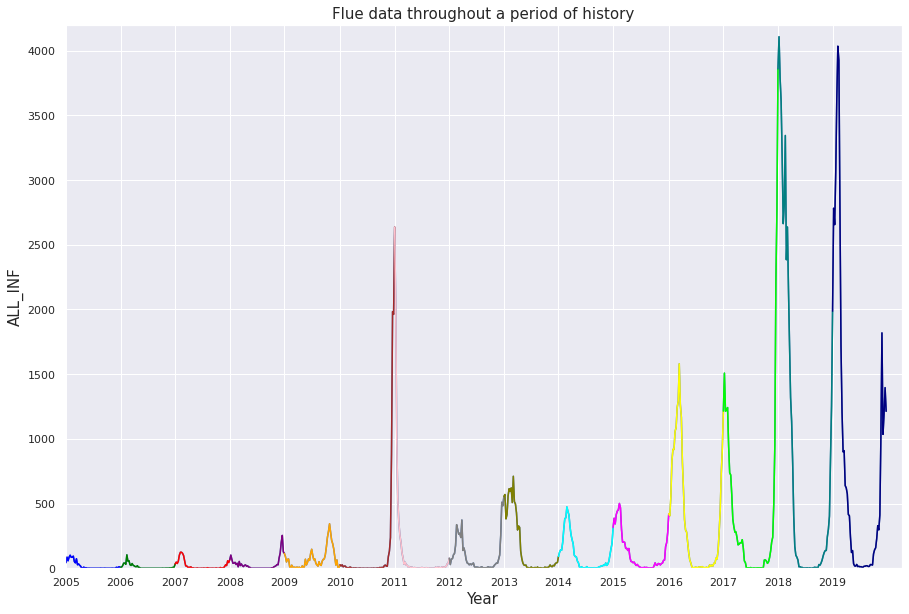

In [33]:
#Set fig size
sns.set(rc={'figure.figsize':(15,10)})

#Plot the graph
X=Concise_database['Week_Sort']
Y=Concise_database["ALL_INF"]
plt.plot(X, Y)
#Setup the colors wit corresponding years
years = [2005 + i for i in range(len(indices))]
Weekdate=[]
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow', 'lime', 'teal', 'navy']

#Loop through each pair of adjacent vertical lines to set the color.
for i in range(len(indices) - 1):
    start_index = indices[i]
    end_index = indices[i+1]
    color = colors[i % len(colors)] # choose a color based on the index
    
    # plot a segment of the line between the vertical lines
    plt.plot(X[start_index:end_index+1], Y[start_index:end_index+1], color=color)

    # plot the vertical line
    plt.vlines(Concise_database['Week_Sort'][start_index], ymin=0, ymax=1,color='black', linestyle='--')
    Weekdate.append(Concise_database['Week_Sort'][start_index])

#Plot the last segment of the line
color = colors[-1]
start_index = indices[-1]
plt.plot(X[start_index:], Y[start_index:], color=color)

#Plot the last vertical line
plt.vlines(Concise_database['Week_Sort'][indices[-1]], ymin=0, ymax=1, color='black', linestyle='--')
Weekdate.append(Concise_database['Week_Sort'][indices[-1]])

#Set limits
plt.xlim(X[0], 850)
plt.ylim(0, 4200)

#Set the x-axis tick labels
plt.xticks(Weekdate, years)
#Labels
plt.xlabel('Year', size=15)
plt.ylabel('ALL_INF',size=15)
plt.title('Flue data throughout a period of history',size=15)

plt.show()

#### Seems like the Influence peaks during December/January time. Let's show that visually

In [34]:
#Seperating the dates into year, month, day
Concise_database['SDATE']=pd.to_datetime(Concise_database['SDATE'], format='%Y/%m/%d')
Concise_database['EDATE']=pd.to_datetime(Concise_database['EDATE'], format='%Y/%m/%d')

/tmp/ipykernel_1825595/448627624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Concise_database['SDATE']=pd.to_datetime(Concise_database['SDATE'], format='%Y/%m/%d')
/tmp/ipykernel_1825595/448627624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Concise_database['EDATE']=pd.to_datetime(Concise_database['EDATE'], format='%Y/%m/%d')


In [35]:
display(Concise_database)

Year  Week      SDATE      EDATE  SPEC_PROCESSED_NB  ALL_INF  \
0    2004    53 2004-12-27 2005-01-02               66.0     43.0   
1    2005     1 2005-01-03 2005-01-09               90.0     44.0   
2    2005     2 2005-01-10 2005-01-16              136.0     86.0   
3    2005     3 2005-01-17 2005-01-23               98.0     58.0   
4    2005     4 2005-01-24 2005-01-30              131.0     86.0   
5    2005     5 2005-01-31 2005-02-06              158.0    101.0   
6    2005     6 2005-02-07 2005-02-13              151.0     85.0   
7    2005     7 2005-02-14 2005-02-20              139.0     86.0   
8    2005     8 2005-02-21 2005-02-27              134.0     94.0   
9    2005     9 2005-02-28 2005-03-06              110.0     52.0   
10   2005    10 2005-03-07 2005-03-13               89.0     42.0   
11   2005    11 2005-03-14 2005-03-20              115.0     74.0   
12   2005    12 2005-03-21 2005-03-27               47.0     27.0   
13   2005    13 2005-03-28 2005-04-03               55.0     34.0   
14   2005    14 2005-04-04 2005-04-10               31.0     24.0   
15   2005    15 2005-04-11 2005-04-17               28.0     16.0   
16   2005    16 2005-04-18 2005-04-24               20.0      2.0   
17   2005    17 2005-04-25 2005-05-01               14.0      3.0   
18   2005    18 2005-05-02 2005-05-08               12.0      9.0   
19   2005    19 2005-05-09 2005-05-15                6.0      2.0   
20   2005    20 2005-05-16 2005-05-22                5.0      5.0   
21   2005    21 2005-05-23 2005-05-29                1.0      1.0   
22   2005    22 2005-05-30 2005-06-05                0.0      0.0   
23   2005    23 2005-06-06 2005-06-12                3.0      1.0   
24   2005    24 2005-06-13 2005-06-19                0.0      0.0   
25   2005    25 2005-06-20 2005-06-26                0.0      0.0   
26   2005    26 2005-06-27 2005-07-03                0.0      0.0   
27   2005    27 2005-07-04 2005-07-10                0.0      0.0   
28   2005    28 2005-07-11 2005-07-17                0.0      0.0   
29   2005    29 2005-07-18 2005-07-24                0.0      0.0   
30   2005    30 2005-07-25 2005-07-31                1.0      0.0   
31   2005    31 2005-08-01 2005-08-07                1.0      0.0   
32   2005    32 2005-08-08 2005-08-14                0.0      0.0   
33   2005    33 2005-08-15 2005-08-21                0.0      0.0   
34   2005    34 2005-08-22 2005-08-28                2.0      1.0   
35   2005    35 2005-08-29 2005-09-04                0.0      0.0   
36   2005    36 2005-09-05 2005-09-11                1.0      0.0   
37   2005    37 2005-09-12 2005-09-18                0.0      0.0   
38   2005    38 2005-09-19 2005-09-25                2.0      1.0   
39   2005    39 2005-09-26 2005-10-02                4.0      0.0   
40   2005    40 2005-10-03 2005-10-09               19.0      0.0   
41   2005    41 2005-10-10 2005-10-16               20.0      0.0   
42   2005    42 2005-10-17 2005-10-23               23.0      0.0   
43   2005    43 2005-10-24 2005-10-30               37.0      0.0   
44   2005    44 2005-10-31 2005-11-06               35.0      0.0   
45   2005    45 2005-11-07 2005-11-13               42.0      1.0   
46   2005    46 2005-11-14 2005-11-20               34.0      0.0   
47   2005    47 2005-11-21 2005-11-27               62.0      0.0   
48   2005    48 2005-11-28 2005-12-04               27.0      0.0   
49   2005    49 2005-12-05 2005-12-11               34.0      8.0   
50   2005    50 2005-12-12 2005-12-18               52.0      3.0   
51   2005    51 2005-12-19 2005-12-25              109.0     10.0   
52   2005    52 2005-12-26 2006-01-01               32.0     11.0   
53   2006     1 2006-01-02 2006-01-08               38.0      7.0   
54   2006     2 2006-01-09 2006-01-15               78.0      9.0   
55   2006     3 2006-01-16 2006-01-22               74.0     21.0   
56   2006     4 2006-01-23 2006-01-29              121.0     40.0   
57 

In [36]:
#Seperating values for months
Month=[]
month_count=np.arange(1,13)
#Setting the sum of the fllu data for the corresponding months
for i in month_count:
    Month_data=Concise_database[Concise_database['SDATE'].dt.month==i]
    Month.append(sum(Month_data['ALL_INF']))

<function matplotlib.pyplot.show(close=None, block=None)>

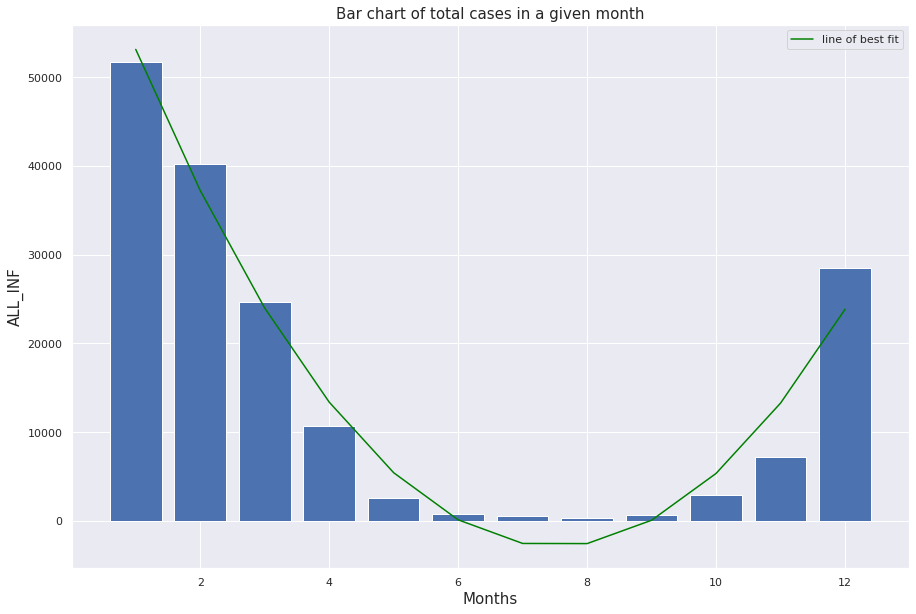

In [37]:
#Set fig size
sns.set(rc={'figure.figsize':(15,10)})
#Plot bar chart
plt.bar(month_count,Month)
#Plot the line of best fit
plt.plot(month_count,np.poly1d(np.polyfit(month_count,Month,2))(month_count),'green',label= 'line of best fit')
#Plot labels
plt.xlabel('Months', size=15)
plt.ylabel('ALL_INF',size=15)
plt.title('Bar chart of total cases in a given month',size=15)
plt.legend()
plt.show

#### By using a barchart, I am able to set the sum of the total cases to their corresponding months to see the relationship of the month and total cases. As shown in the chart on the line of best fit the total cases are rising from the 8th month and descending from the 1st month.

#### The flu is much higher during the winter months compared to the summer months


# Checking correlations


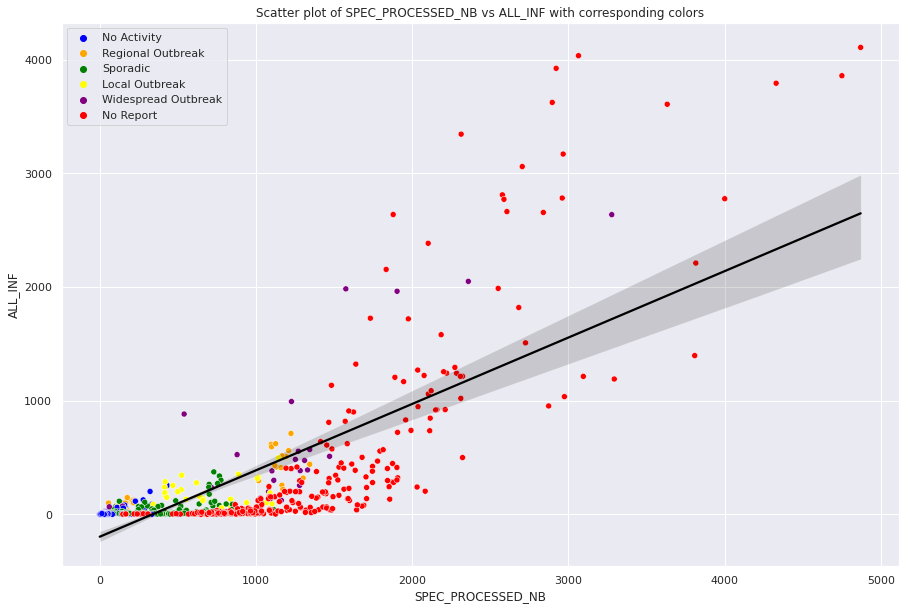

In [38]:
#Defining the colors for each string value in column 'TITLE'
colors = {'No Report': 'red', 'No Activity': 'blue', 'Sporadic': 'green', 'Local Outbreak': 'yellow', 'Widespread Outbreak': 'purple', 'Regional Outbreak': 'orange'}

#Creating a scatter plot, with colors based on values in column 'TITLE'
sns.scatterplot(x=Concise_database["SPEC_PROCESSED_NB"], y=Concise_database["ALL_INF"], hue=Concise_database['TITLE'], palette=colors)

#Adding aine of best fit
sns.regplot(x=filtered_database["SPEC_PROCESSED_NB"], y=filtered_database["ALL_INF"], scatter=False, color='black')

#Adding a legend for the colors
plt.title('Scatter plot of SPEC_PROCESSED_NB vs ALL_INF with corresponding colors')
plt.legend()
plt.show()

#### Visually I do not see any correlation between the processed and the flu data that involves the TITLE. Seems like there is no correlation with NO REPORT visually, I'll remove this from the database and retest the graph

In [39]:
Report_database = Concise_database[Concise_database['TITLE'] != 'No Report']

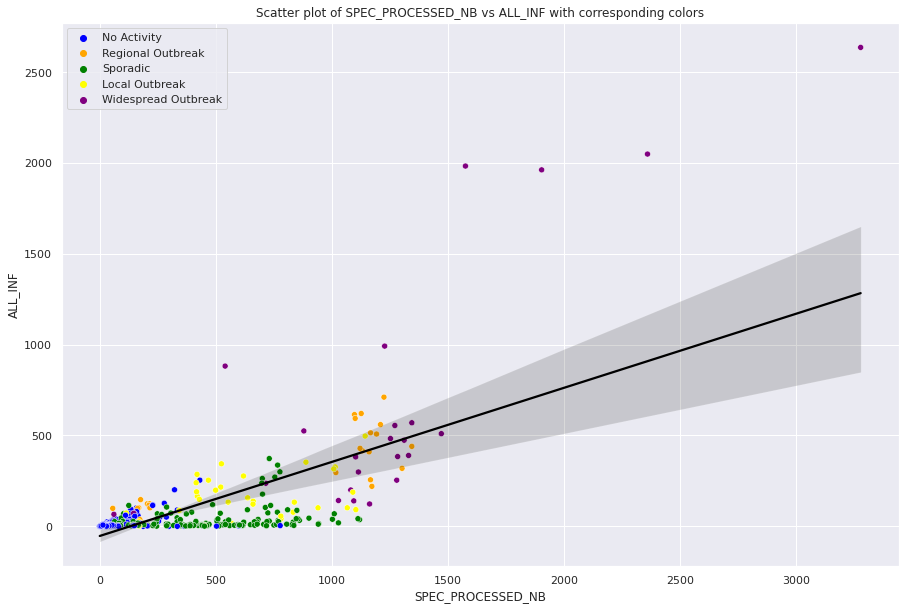

In [40]:
# define the colors for each string value in column 'TITLE'
colors = {'No Report': 'red', 'No Activity': 'blue', 'Sporadic': 'green', 'Local Outbreak': 'yellow', 'Widespread Outbreak': 'purple', 'Regional Outbreak': 'orange'}

# create a scatter plot of x vs y, with colors based on values in column 'TITLE'
sns.scatterplot(x=Report_database["SPEC_PROCESSED_NB"], y=Report_database["ALL_INF"], hue=Report_database['TITLE'], palette=colors)

# add a regression line to the plot
sns.regplot(x=Report_database["SPEC_PROCESSED_NB"], y=Report_database["ALL_INF"], scatter=False, color='black')

# add a legend for the colors
plt.title('Scatter plot of SPEC_PROCESSED_NB vs ALL_INF with corresponding colors')
plt.legend()
plt.show()


#### Even by removing the 'No Report' data, I cannot see the correlation visually, nor with a line of best fit.

#### It's quite unclear to compare the correlation as the colours are all over the place.

### Check Appropriate Regression Model

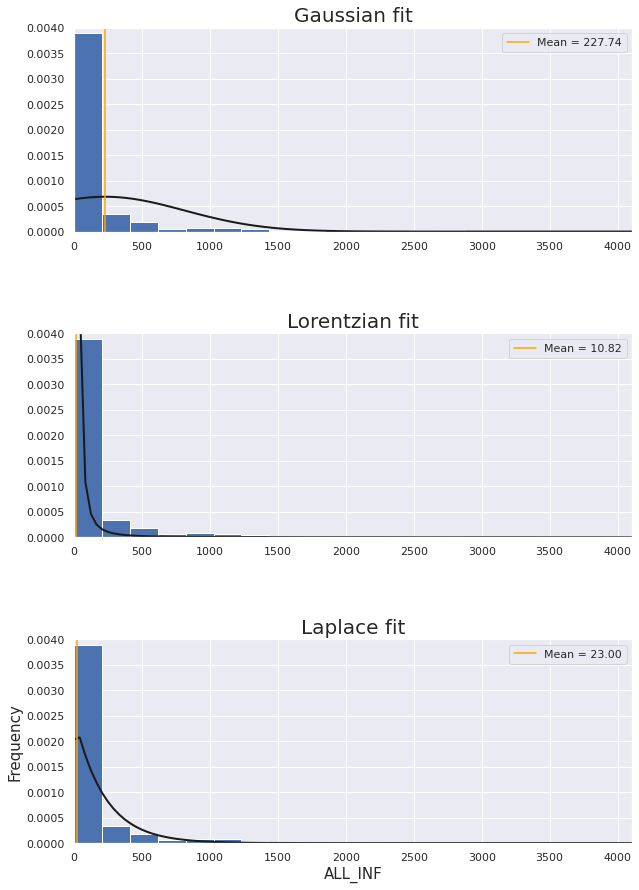

In [41]:
#Setting up variables
xmin, xmax = Concise_database["ALL_INF"].min(),Concise_database["ALL_INF"].max()
x = np.linspace(xmin, xmax, 100)

#Gaussian values
mean=Concise_database["ALL_INF"].mean()
std=Concise_database["ALL_INF"].std()
Gaussian = norm.pdf(x, mean, std)

#Lorentzian values
mean_Loren, std_Loren = cauchy.fit(Concise_database["ALL_INF"])
Lorentzian = cauchy.pdf(x, mean_Loren, std_Loren)

#Laplace values
mean_lap, std_lap = laplace.fit(Concise_database["ALL_INF"])
Laplace = laplace.pdf(x, mean_lap, std_lap)

#Set up subplots and lavbels
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
fig.subplots_adjust(hspace=0.5)  #Adds a vertical space between subplots
plt.xlabel('ALL_INF', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

#Creating a histogram of the data
ax[0].hist(Concise_database["ALL_INF"], bins=20, density=True)

# Fit a Gaussian distribution to the data
ax[0].plot(x, Gaussian, 'k', linewidth=2)

#Set labels
ax[0].set_title('Gaussian fit', fontsize=20)
ax[0].set_xlim(0,Concise_database["ALL_INF"].max())
ax[0].set_ylim(0,0.004)
#Set mean
ax[0].axvline(mean, label=("Mean = {:.2f}".format(mean)), color=("orange"))
ax[0].legend()

#Plotting the Lorentzian
ax[1].hist(Concise_database["ALL_INF"], bins=20, density=True)
ax[1].plot(x, Lorentzian, 'k', linewidth=2)

#Set up labels and mean
ax[1].set_title('Lorentzian fit', fontsize=20)
ax[1].axvline(mean_Loren, label=("Mean = {:.2f}".format(mean_Loren)), color=("orange"))
ax[1].set_xlim(0,Concise_database["ALL_INF"].max())
ax[1].set_ylim(0,0.004)
ax[1].legend()

#Plotting the Laplace
ax[2].hist(Concise_database["ALL_INF"], bins=20, density=True)
ax[2].plot(x, Laplace, 'k', linewidth=2)

#Set up labels and mean
ax[2].set_title('Laplace fit', fontsize=20)
ax[2].axvline(mean_lap, label=("Mean = {:.2f}".format(mean_lap)), color=("orange"))
ax[2].set_xlim(0,Concise_database["ALL_INF"].max())
ax[2].set_ylim(0,0.004)
ax[2].legend()


#### Lorentzian looks visually the best

### Log-Likelihood and AIC

In [42]:
#Calculate the log-likelihood of Gaussian
log_likelihood_G = np.sum(norm.logpdf(Concise_database["ALL_INF"], mean, std))
print("Log-likelihood:", log_likelihood_G)

n = len(Concise_database["ALL_INF"])
#For mean and std
k = 2  
#Calculate the AIC
AIC = -2*log_likelihood_G + 2*k + 2*k*(k+1)/(n-k-1)
print("AIC for Gaussian:", AIC)

#Calculate the log-likelihood of Lorenztian
log_likelihood_Lo = np.sum(cauchy.logpdf(Concise_database["ALL_INF"],mean_Loren, std_Loren))
print("Log-likelihood:", log_likelihood_Lo)

#Calculate the AIC
AIC =  -2*log_likelihood_Lo + 2*k + 2*k*(k+1)/(n-k-1)
print("AIC for Lorentzian:", AIC)

#Calculate the log-likelihood of Laplace
log_likelihood_La = np.sum(laplace.logpdf(Concise_database["ALL_INF"], mean_lap, std_lap))
print("Log-likelihood:", log_likelihood_La)

#Calculate the AIC
AIC = -2*log_likelihood_La + 2*k + 2*k*(k+1)/(n-k-1)
print("AIC for Laplace:", AIC)



Log-likelihood: -5841.143310095396
AIC for Gaussian: 11686.30268444782
Log-likelihood: -4692.217159613845
AIC for Lorentzian: 9388.450383484718
Log-likelihood: -5321.106773955471
AIC for Laplace: 10646.22961216797


#### Lorentzian has the lowest AIC and the Log Likelihood is the closest to zero.
#### It is also the most visually pleasing regression model.

#### Therefore we're going to use the Lorentzian fit for our regression model

# Regression Model

In [43]:
#Function to create random sample data of flu
def Random_sample(name):
    #Creates random data
    Sample = np.random.choice(name, size=len(name), replace=True)
    #Sorts the data
    Sort = np.sort(Sample)
    #Get Lorentzian mean and std
    Mean_Loren, Std_Loren = cauchy.fit(Sort)
    xmin, xmax = Sort.min(),Sort.max()
    x = np.linspace(xmin, xmax, 100)

    return(Sample, Sort, Mean_Loren, Std_Loren, x)

In [44]:
#Check it 3 times
Sample_1, Sort_1, Mean_Loren_1, Std_Loren_1,x_1= Random_sample(Concise_database["ALL_INF"]) 
Sample_2, Sort_2, Mean_Loren_2, Std_Loren_2,x_2= Random_sample(Concise_database["ALL_INF"]) 
Sample_3, Sort_3, Mean_Loren_3, Std_Loren_3,x_3= Random_sample(Concise_database["ALL_INF"]) 

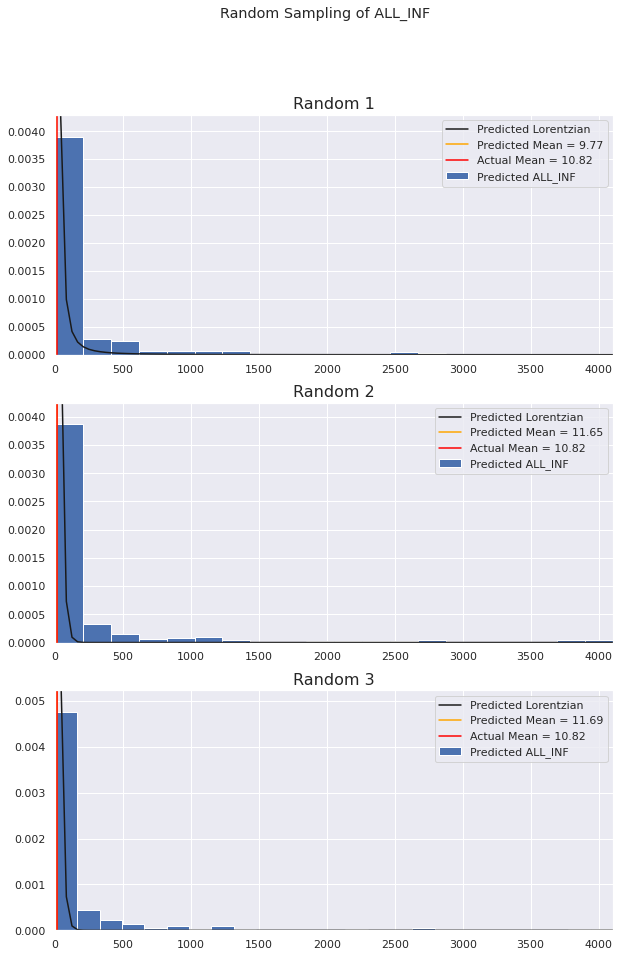

In [45]:
#Subplot size
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

#Ploting the 3 datasets
hist1, _, _ = ax[0].hist(Sort_1, density = True,  bins = 20, label = 'Predicted ALL_INF')
ax[0].plot(x_1, cauchy.pdf(x_1, Mean_Loren_1, Std_Loren_1), color = 'k', label = 'Predicted Lorentzian')
           
#Limits
ax[0].set_title('Random 1', fontsize = 16)
ax[0].axvline(Mean_Loren_1, color = 'orange', label =("Predicted Mean = {:.2f}".format(Mean_Loren_1)))
ax[0].axvline(mean_Loren, label=("Actual Mean = {:.2f}".format(mean_Loren)), color=("red"))
ax[0].set_xlim(0, Sort_1.max())
ax[0].set_ylim(0, max(hist1)*1.1)
ax[0].legend()

#Plots
hist2, _, _ = ax[1].hist(Sort_2, density = True, bins = 20, label = 'Predicted ALL_INF')
ax[1].plot(x_2, laplace.pdf(x_2, Mean_Loren_2, Std_Loren_2), color = 'k', label = 'Predicted Lorentzian')
           
#Limits
ax[1].set_title('Random 2', fontsize = 16)
ax[1].axvline(Mean_Loren_2, color = 'orange', label =("Predicted Mean = {:.2f}".format(Mean_Loren_2)))
ax[1].axvline(mean_Loren, label=("Actual Mean = {:.2f}".format(mean_Loren)), color=("red"))
ax[1].set_xlim(0,Sort_2.max())
ax[1].set_ylim(0, max(hist2)*1.1)
ax[1].legend()

#Plots
hist3, _, _ = ax[2].hist(Sort_3, density = True, bins = 25, label = 'Predicted ALL_INF')
ax[2].plot(x_3, laplace.pdf(x_3, Mean_Loren_3, Std_Loren_3), color = 'k', label = 'Predicted Lorentzian')

#Limits
ax[2].set_title('Random 3', fontsize = 16)
ax[2].axvline(Mean_Loren_3, color = 'orange', label = ("Predicted Mean = {:.2f}".format(Mean_Loren_3)))
ax[2].axvline(mean_Loren, label=("Actual Mean = {:.2f}".format(mean_Loren)), color=("red"))
ax[2].set_xlim(0,Sort_3.max())
ax[2].set_ylim(0, max(hist3)*1.1)
ax[2].legend()
           
#title
fig.suptitle('Random Sampling of ALL_INF')
plt.show()


#### Seems visually consistent with the real mean. Let's check the confidence interval via bootstrapping

### Checking if Lorentzian is appropriate vis bootstrapping

In [46]:
def Bootstrapping(Name, n):
    #Blank Variable
    Mean_B = np.zeros(n)
    
    for i in range(n):
       # Create sample data
        Sample_B = np.random.choice(Name, size=len(Name), replace=True)
        #Sort the data
        Sort = np.sort(Sample_B)
        #Save the Lorentzian mean and std
        Mean_B[i], Std_B = cauchy.fit(Sort)

    return(Mean_B)

In [47]:
#1000 simulations
n=1000
Mean_B_1 = Bootstrapping(Concise_database["ALL_INF"], n)

In [48]:
alpha = 0.95  # Confidence level

lower_percentile = (1 - alpha) / 2
upper_percentile = 1 - lower_percentile

lower_bound = np.percentile(Mean_B_1, lower_percentile * 100)
upper_bound = np.percentile(Mean_B_1, upper_percentile * 100)
#The confidence interval of 95%
Interval = (mean_Loren >= lower_bound) and (mean_Loren<= upper_bound)

#Print the results of the confidence interval
print("Real Lorentzian mean:", mean_Loren)
print("Confidence interval:", lower_bound, "-", upper_bound)
if Interval:
    print("The real mean is within the confidence interval.")
else:
    print("The real mean is outside the confidence interval.")

Real Lorentzian mean: 10.821030417176006
Confidence interval: 8.386943746624262 - 13.61953592875439
The real mean is within the confidence interval.


#### Over a 1000 simulations of random data and it is in the confidence interval

# Use a machine learning technique to model a given result (outcome) of your chosen dataset and evaluate the results. 

In [49]:
#Defineing the predictor variable(s) and the response variable
X = Concise_database['Week_Sort'].values.reshape(-1, 1)
Y = Concise_database['ALL_INF'].values 

#Set up the training variavle
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, test_size=0.2, shuffle = True)

#Training the model
RFG = RandomForestRegressor(n_estimators=100, random_state=42)

#Fit the model on the data
RFG.fit(X_Train, Y_Train)

#Make predictions using the model
Y_pred = RFG.predict(X)

<function matplotlib.pyplot.show(close=None, block=None)>

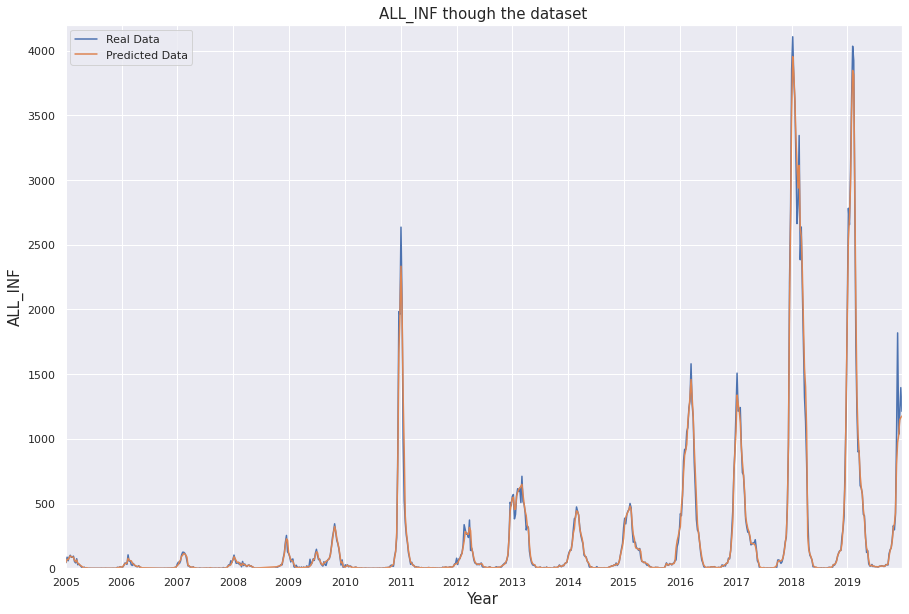

In [50]:
#Plot real data
plt.plot(X,Y,label='Real Data')
#plot fake data
plt.plot(X, Y_pred,label='Predicted Data' )

#plot years as xticks
years = [2005 + i for i in range(len(indices))]
Weekdate=[]
for index in indices:
    plt.vlines(Concise_database['Week_Sort'][index],ymin=0, ymax=0, color='black', linestyle='--')
    Weekdate.append(Concise_database['Week_Sort'][index])
#Set limits
plt.xlim(X[0], X[-1])
plt.ylim(0,4200)

#Set the x-axis tick labels
plt.xticks(Weekdate, years)
plt.xlabel('Year', size=15)
plt.ylabel('ALL_INF',size=15)
plt.title('ALL_INF though the dataset',size=15)
plt.legend()
plt.show

#### Visually, the fake data looks very accurate to the real data. Let's test the fake data with the Lorentzian so see if it has similar parameters to the real data

In [51]:
#Setting up variables
xmin, xmax = Y_pred.min(),Y_pred.max()
x = np.linspace(xmin, xmax, 100)

#Set predicted Lorentzian variables
Mean_Loren_pred, Std_Loren_pred = cauchy.fit(Y_pred)
Lorentzian_pred = cauchy.pdf(x, Mean_Loren_pred, Std_Loren_pred)

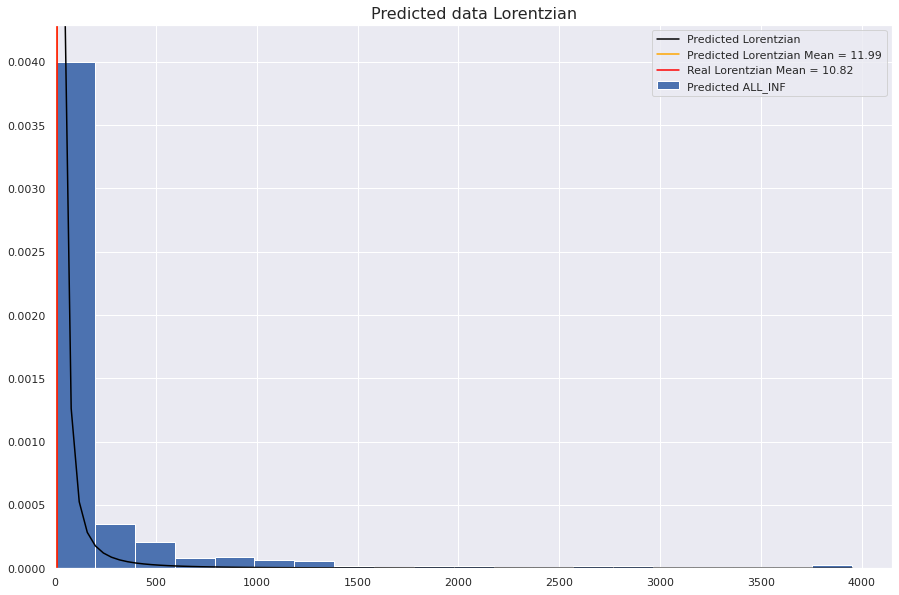

In [52]:
#Plot histogram
hist, _, _ = plt.hist(Y_pred, density = True,  bins = 20, label = 'Predicted ALL_INF')

#plot predicted lorentzian
plt.plot(x, Lorentzian_pred , color = 'black', label = 'Predicted Lorentzian')

#Labels and limits
plt.title('Predicted data Lorentzian', fontsize = 16)
plt.axvline(Mean_Loren_pred, color = 'orange', label =("Predicted Lorentzian Mean = {:.2f}".format(Mean_Loren_pred)))
plt.axvline(mean_Loren, label=("Real Lorentzian Mean = {:.2f}".format(mean_Loren)), color=("red"))
plt.xlim(0, Y_pred.max()*1.05)
plt.ylim(0, max(hist1)*1.1)
plt.legend()
plt.show()

#### It looks visually pleasing and is close to the real mean, similar to the regression model with fake data. Let's see if it will uphold on our bootstrapping

In [53]:
def Machine_Boot(n):
    #Blank variavle
    Mean_MB = np.zeros(n)
    Std_MB = np.zeros(n)
    #Defining the predictor variable(s) and the response variable
    X = Concise_database['Week_Sort'].values.reshape(-1, 1)
    Y = Concise_database['ALL_INF'].values 
    RFG = RandomForestRegressor(n_estimators=100, random_state=42)

    for i in range (n):
        #Set up the training variable
        X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, test_size=0.2, shuffle = True)

        #Fit the model on the data
        RFG.fit(X_Train, Y_Train)

        #Make predictions using the model
        Y_pred_list = (RFG.predict(X)) 
        
        #Mean model
        Mean_MB[i], std = cauchy.fit(Y_pred_list)
   
    return(Mean_MB)

In [54]:
Mean_MB_1= Machine_Boot(1000)

In [55]:
alpha = 0.95  # Confidence level
lower_percentile = (1 - alpha) / 2
upper_percentile = 1 - lower_percentile

#Calculating the confidence interval of 95%
lower_bound = np.percentile(Mean_MB_1, lower_percentile * 100)
upper_bound = np.percentile(Mean_MB_1, upper_percentile * 100)

Interval = (mean_Loren >= lower_bound) and (mean_Loren<= upper_bound)

In [56]:
#Print the results of the confidence interval check
print("Real Lorentzian mean:", mean_Loren)
print("Confidence interval:", lower_bound, "-", upper_bound)
if Interval:
    print("The real mean is within the confidence interval.")
else:
    print("The real mean is outside the confidence interval.")

Real Lorentzian mean: 10.821030417176006
Confidence interval: 11.484892714817795 - 12.55986704532342
The real mean is outside the confidence interval.


#### It is outside of the confidence interval

# Formulate a conclusion on the validity and performance of the three approaches you used in questions 1 – 3 and discuss which technique would be your first choice and why. Finally, rank the methods (graph, regression, machine learning) in order of merit/suitability for your chosen dataset. 

#### The dataset given to me is a flu dataset with many blank values. I first had to clean the data in order to make use of it.

#### For question 1, I had to visuallise the data, which was done to a good standard by showing the flue across the weeks and locating the sum of the flu with the corresponding months. My third visuallation shows the process NB vs the flu data with the colours corresponding to the TITLE. This wasn't a very well made visual graph as there wasn't any significant correlation or patterns seen on it.

#### For question 2, I plotted an histogram and checked which regression model what was most suitable by checking the log likelihood and AIC values, which came to be Loretnzian and afterwards I checked if it would pass bootstrapping, which it did.

#### For question 3, I used Forest Regression as my model. After overlapping the model with the real data I could visually see that they were almost identical. I used the Lorentzian regression model on the ML model and after bootstrapping I found out that it failed the 95% confidence interval.


#### I would start of with doing question one to visualise the data as i would need that to compare it with the ML model and it is needed to see what I'm using the regression model on. As the regression model passed the Confidence interval and the ML didn't I will rank Question number 2 as my second order for suitability as the bootstrapping was a success. And lastly I didn't find the ML model suitable as it failed the Confidence interval for my regression model.

#### However the ML did very well in it's model when compared with the real data

#### But compared to the regression model created with fake data in question 2, it lacks the time efficiency as it takes much longer to go through it's bootstrapping and, as said before, it lacks the confidence interval with the real Lorentzian mean